# Presentation of the model
## Autarky case
### Demand
In country $n$, demand consists in a representative consumer who has to choose his consumption of cereals $q_{c,n}$ and meat $q_{m,n}$ with a CES utility function, and the following problem:
$$ \max_{\left\lbrace q_{c,n}, q_{m,n} \right\rbrace} \left\lbrace U(q) = 
\Big[ q_{c,n}^{\frac{\sigma -1}{\sigma}} + q_{m,n}^{\frac{\sigma -1}{\sigma}} \Big]^{\frac{\sigma}{\sigma -1}} \right\rbrace
$$
Subject to:
$$ q_{c,n} + q_{m,n} p = y_n $$
$$ q_{c,n} \geq 0, \hspace{3mm} q_{m,n} \geq 0 $$
The price of cereals is normalized to 1, and $p$ stands for the relative price of meat on cereals.
### Supply
There are 2 types of producers: cereal producers and meat producers, with the following production functions:
$$ Q_{c, n} (L_{c, n}) = L_{c, n}.\theta_c(d_n) $$
and 
$$ Q_{m, n} (L_{m, n}; K_{m, n})= \min \left\lbrace a_m L_{m, n} ; b_m K_{m, n} \right\rbrace $$
Where $d_n$ is the distance of country $n$'s temperature compared to the optimal temperature for growing crops, and $\theta_c(d_n)$ the productivity function, decreasing with $d_n$. 
Land, $L$, is the only input used either for growing crops or raising livestock, and $K_{m, n}$ stands for the cereals used as feed into meat production. Land and cereals are perfect complements in meat producers' function.

The perfect competition assumption makes profits negative which yield the optimal price:
$$p^\ast = \frac{\theta_c({d_n})}{a_m} + \frac{1}{b_m}$$
### Equilibrium
The equilibrium must satisfy the following constraints:
$$ L_{c, n} + L_{m, n} = \overline{L}_n $$
$$ Q_{c, n} (L_{c, n}) = q_{c, n} + K_{m, n} $$
$$ Q_{m, n} (L_{c, n}; K_{m, n}) = q_{m, n} $$
\end{align}
Where $\overline{L}_n$ is the total available arable land in country $n$.
### Subsistence consumption
We check the satisfaction of subistence consumption ex-post. Denote $\underline{Q}$ the minimal quantity of calories (or any nutritional indicator) to eat for survival, and $M= \begin{pmatrix}
\mu_m \\
\mu_c
\end{pmatrix}$ the conversion matrix of kgs into calories (or any nutritional indicator). We assume $ 1 \geq \mu_m \geq \mu_c \geq 0 $\\
Subsistence consumption is satisfied if:
$$ (q_{m, n}^\ast \hspace{2mm} q_{c, n}^\ast) . M \geq \underline{Q} $$
### Notes
The equilibrium and the conditions for the satisfaction of subsistence consumption are solvable by hand. Yet, I programed both the numerical and analytical solutions, whih yield similar result with a tolerance of 1e8. The plots below are computed from the analytical solutions.

## Trade case
### Demand
We assume agents to be the same across countries, i.e. to have same CES $\sigma$. Therefore, the program is the same as under autarky
### Production
Under trade, we assume land to be a fully immobile input, while cereals can be freely traded (we assume no trade costs). Production functions are the same as under autarky, and all countries have the same technologies $a_m$, $b_m$ and $\theta_c(.)$. However, countries may have different land endowments and different temperatures.

Now, the optimal world price is:
$$p^\ast = \frac{\theta_w}{a_m} + \frac{1}{b_m}$$
Where $\theta_w$ denotes the aggregate crop productivity, and depends on the amount of land in the world allocated to crop production.
### Equilibrium
Under trade, the equilibrium must satisfy the following constraints:
$$ \forall n \in \left\lbrace R, P \right\rbrace, \hspace{3mm} L_{c, n} + L_{m, n} = \overline{L}_n $$
$$ Q_{c, P} + Q_{c, R} = q_{c, P} + q_{c, R} + K_{m, P} + K_{m, R} $$
$$ Q_{m, P} + Q_{m, R} = q_{m, P} + q_{m, R} $$
$$ \text{where} \hspace{3mm} q_{i,n} = q_{i,n, n} +  q_{i,n^\ast, n} \hspace{3mm} \text{and} \hspace{3mm} K_{m,n} = K_{m,n,n} +  K_{m,n^\ast,n} $$
$$ q_{c, P, R} + K_{m, P, R} + q_{c, R, P} + K_{m, R, P} = 0 $$
$$ q_{m, P, R} + q_{m, R, P} = 0 $$
### Subsistence consumption
The conditions for subsistence consumption to be satisfied are the same as under autarky, except equilibrium quantities for cereals and meat are now derived worldwide.
### Notes
Under autarky, we analytically solved for the equilibrium by equating $ a_m L_{m, n} = b_m K_{m, n} $, which yielded land allocated to crop production as a function of net cereal consumption $ L_{c,n}(q_{c,n}) $, then meat production as a function of $q_{c,n}$ and ended up resulting with both Relative Demand and optimal levels of $q_{c,n}$ and $q_{m,n}$.

Under trade, everything gets more complicated because worldwide productivity of land now depends on the amount of land allocated to cereal production (because countries have different temepratures, hence different crop yields). The model is not solvable by hand, hence the need for computational methods.

Below, I plot several dataframes corresponding to worlds with different chracteristics.
## Endogene temperature
Finally, I make temepratures a function of meat production as the livestock sector is responsible for almost all agricultural GHG emissions. The dynamics of temeprature are modelled that way:
$$ e_t = k_1 * q_m(T_{t-1}) $$
$$ GHG_t = k_2 * GHG_{t-1} + e_{t} $$  
$$ T_t = T_0 + k_3 * GHG_t $$
Where $e_t$ represents agricultural GHG emissions, where GHG have a natural dynamic depending on $k_2$, and temperature depends on the total amount of GHG emissions. 

Agents now solve an intertemporal maximization problem:
$$ V(T_t) = \max_{q_{m,t+1}} \left\lbrace u(q_{c,t} , q_{m,t}) + \beta V(T_{t+1}) \right\rbrace $$
Subject to:
$$ q_{c,t} = \theta(T_{t}) \overline{L} - q_{m,t} \left( \frac{\theta(T_{t})}{a} + \frac{1}{b} \right) $$
$$ T_{t+1} = T_0 + k_3 (k_2 . GHG_{t-1} + k_1 . q_{m,t}) $$

For now, I have not been able to write a proper code for that part.


# Plots and results

## Autarky
### Main results
I plot here how the results of the analytical solution evolve with the three different characteristics of countries: land endowment, temeprature, and CES.

We obtain as predicted that the consumption of cereals increases with sigma while the consumption of meat decreases with sigma.

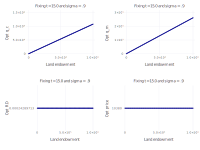

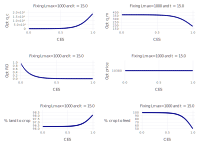

In [1]:
include("src/autarkyplots.jl")
autarkyplots.plotall()

## Trade
Below, we plot results in a world with 2 countries with same CES = .5, and we make land endowment and temperature vary. We also plot the results for a world with 3 countries and differences in both land endowment and temperatures.
For each world I plot one table with results at the country scale, and one table with global results.

When the 2 countries are identical, we obtain as expected that the countries produce the same amount of cereals and meat, and that none of them exports or imports ("trade_in_cereals" and "Trade_in_meat" close to 0). We also find that the country that has a higher endowment in land has a higher share in total cereal production, produces all the meat and exports both products. As predicted again, the country with the highest crop productivity exports both products. 

Note1: exports and imports are only roughly equal, due to the approximations to find the trade equilibrium.

Note2: so far, I have not been able to code cases where there are more than 2 countries among which at least 2 have same land endowment or same temperatures.

In [2]:
include("src/tradeeqdf.jl")
tradeeqdf.runall()

2 indentical countries
2×9 DataFrames.DataFrame
│ Row │ Land_endowment │ Temperature │ CES │ Crop_yields │ Share_land_to_crops │
├─────┼────────────────┼─────────────┼─────┼─────────────┼─────────────────────┤
│ 1   │ 1500.0         │ 13.75       │ 0.9 │ 3050.0      │ 0.5                 │
│ 2   │ 1500.0         │ 13.75       │ 0.9 │ 3050.0      │ 0.5                 │

│ Row │ Share_cereal_prod │ Share_meat_prod │ Trade_in_cereals │ Trade_in_meat │
├─────┼───────────────────┼─────────────────┼──────────────────┼───────────────┤
│ 1   │ 0.5               │ 0.5             │ -0.00470488      │ 4.56564e-7    │
│ 2   │ 0.5               │ 0.5             │ -0.00470488      │ 4.56564e-7    │
1×4 DataFrames.DataFrame
│ Row │ Net_cereal_cons │ Meat_cons │ Tot_land_to_crops │ Per_land_to_crops │
├─────┼─────────────────┼───────────┼───────────────────┼───────────────────┤
│ 1   │ 89256.5         │ 879.257   │ 2912.07           │ 97.0691           │
--------------------------------------------

## Subsistence consumption constraint
Here we plot how the satisfaction of the subsistence consumption moves with the characteristics of the country (resp. world). In order to make plots out of these, the function yields a 1 when the condition is satisfied, and 0 if not.
Note that this highly depends on the calibration of the parameters, that we have not done properly yet.

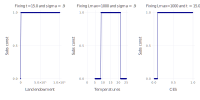

In [3]:
include("src/subsistconst.jl")
subsistconst.plotall()

## Endogene temperature
So far, I have not been able to write a proper code for dynamic programming